In [2]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

> ### Veri Kaynağı: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset

In [3]:
data = pd.read_csv("../SistersLab-Project/PCOS_data.csv")

 |**Feature No**|**FEATURE**|**DESCRIPTION**|
 |---|---|---|
 0   |Sl. No | Seri Numarası
 1   |Patient File No. | Hasta dosya numarası 
 2   |PCOS (Y/N) | PCOS sendromunun olup olmaması
 3   |Age (yrs) | Yaş  
 4   |Weight (Kg) | Kilo       
 5   |Height(Cm) | Boy             
 6   |BMI | Vücut Kitle İndeksi                    
 7   |Blood Group | Kan grubu: A+=11, A-=12, B+=13, B-=14, O+=15, O-=16, AB+=17, AB-=18|            
 8   |Pulse rate(bpm) | Kalp atış hızı        
 9   |RR (breaths/min) | Solunum hızı     
 10  |Hb(g/dl) | Hemoglobin               
 11  |Cycle(R/I) | Regl döngüsünün düzenli olup olmadığı          
 12  |Cycle length(days) | Menstrüal döngü uzunluğu       
 13  |Marriage Status (Yrs) | Evli olup olmadığı 
 14  |Pregnant(Y/N) | Hamile olup olmadığı            
 15  |No. of abortions | Kürtaj sayısı         
 16  |I beta-HCG(mIU/mL) | beta-HCG seviyesi 
 17  |II beta-HCG(mIU/mL) | ?????? | 
 18  |FSH(mIU/mL) | FSH seviyesi:               
 19  |LH(mIU/mL) | LH seviyesi: Yumurtlamayı sağlayan hormon           
 20  |FSH/LH | FSH/LH oranı                
 21  |Hip(inch) | Kalça             
 22  |Waist(inch) | Bel              
 23  |Waist:Hip Ratio | Bel/Kalça oranı         
 24  |TSH (mIU/L) | Tiroit stimülan hormon  seviyesi          
 25  |AMH(ng/mL) | Anti Müllerian Hormonu: yumurtalık rezervinin kalitesi             
 26  |PRL(ng/mL) | Prolaktin hormon seviyesi               
 27  |Vit D3 (ng/mL) | D vitamini seviyesi          
 28  |PRG(ng/mL) | Progesteron seviyesi              
 29  |RBS(mg/dl) | Rastgele bir zamanda kan şekeri              
 30  |Weight gain(Y/N) | Kilo alımı 
 31  |hair growth(Y/N) | Saç uzaması         
 32  |Skin darkening (Y/N) | Cilt kararması     
 33  |Hair loss(Y/N) | Saç kaybı       
 34  |Pimples(Y/N) | Sivilce         
 35  |Fast food (Y/N) | Fast Food tüketilip tüketilmediği         
 36  |Reg.Exercise(Y/N) | Düzenli egzersiz yapılıp yapılmadığı      
 37  |BP _Systolic (mmHg) | 120-129 mm Hg      
 38  |BP _Diastolic (mmHg) | <80 mm Hg    
 39  |Follicle No. (L) | Folikül sayısı (L)     
 40  |Follicle No. (R) | Folikül sayısı (R)   
 41  |Avg. F size (L) (mm) | Ortalama folikül boyutu (L)   
 42  |Avg. F size (R) (mm) | Ortalama folikül boyutu (R)    
 43  |Endometrium (mm) | Rahim kalınlığı         
 44  |Unnamed: 44 | İsimsiz sütun 

In [12]:
data.sample(4)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
144,145,145,0,37,68.0,153.0,29.0,15,80,22,11.2,2,5,14.0,0,0,1.99,1.99,4.19,1.49,2.81,37,30,0.81,1.40,9.9,10.01,23.5,0.58,130.0,0,0,0,1,0,1.0,1,120,80,3,3,21.0,18.0,9.3,NaN
521,522,522,0,40,78.0,155.0,32.5,15,74,20,11.2,2,5,14.0,0,0,212.75,1.99,9.14,3.22,2.84,48,46,0.96,2.09,2.5,25.04,23.4,0.25,92.0,0,1,0,0,1,0.0,0,120,80,8,10,19.0,21.0,8.0,NaN
433,434,434,0,33,57.0,163.0,21.5,15,72,18,11.5,2,6,10.0,0,0,1.99,1.99,4.09,2.63,1.56,32,28,0.88,1.08,10.3,10.62,27.2,0.25,100.0,0,0,0,1,1,1.0,1,110,70,5,7,13.0,11.0,10.0,NaN
322,323,323,0,28,61.0,150.0,27.1,11,72,24,10.8,2,6,6.5,0,0,1.99,1.99,7.03,2.30,3.06,39,35,0.90,0.22,3.6,26.89,32.4,0.35,85.0,1,0,0,0,1,1.0,0,110,80,7,11,15.0,18.0,8.0,NaN


In [13]:
data.shape

(541, 45)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [15]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [16]:
df = data.drop(["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1)

In [17]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [19]:
df["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

### Kolon isimlerinde düzenleme yaptım. Boşluklar rahatsız ediciydi.

In [20]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [21]:
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)
df.rename(columns={'Marraige Status (Yrs)': 'Marriage Status (Yrs)'}, inplace=True)
df.rename(columns={'Pulse rate(bpm) ': 'Pulse rate(bpm)'}, inplace=True)
df.rename(columns={'II    beta-HCG(mIU/mL)': 'II beta-HCG(mIU/mL)'}, inplace=True)
df.rename(columns={' Age (yrs)': 'Age (yrs)'}, inplace=True)
df.rename(columns={'  I   beta-HCG(mIU/mL)': 'I beta-HCG(mIU/mL)'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marriage Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  I beta-HCG(mIU/mL)     541 non-null    float64
 15  II bet

### Normalde int/float olması gereken sütunların object olduğunu gördüm bunları sayısal değerlere çevirmek istedim.
* Burada '1.99.' şeklinde yazılmış str ifade olduğu için bunu ayrı düzenledim.

In [23]:
df[df["II beta-HCG(mIU/mL)"] == '1.99.'] 

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
123,1,23,40.0,150.0,17.8,15,74,18,10.8,2,5,2.0,0,0,1.99,1.99.,5.0,5.15,0.97,46,38,0.83,1.69,19.8,15.23,23.5,0.93,92.0,1,1,1,1,0,1.0,1,100,70,10,13,18.0,17.0,12.5


In [24]:
df.loc[df['II beta-HCG(mIU/mL)'] == '1.99.', 'II beta-HCG(mIU/mL)'] = 1.99

In [25]:
df[df["II beta-HCG(mIU/mL)"] == '1.99.'] # kontrol ettim tekrar

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


### Modeli çalıştırınca bir sütunda 'a' değeri olduğuna dair bir hata aldım. Bunun yerini tespit ettim.

In [26]:
df[df.index == 305]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
305,0,37,56.0,152.0,24.2,13,74,20,11.7,2,5,9.0,0,0,42.0,1.99,2.91,0.35,8.31,35,33,0.94,16.0,a,2.22,38.6,0.3,100.0,0,0,0,0,1,0.0,1,120,70,4,5,17.0,16.0,5.6


In [27]:
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan # eksik değer

In [28]:
df[df.index == 305] # kontrol ettim

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
305,0,37,56.0,152.0,24.2,13,74,20,11.7,2,5,9.0,0,0,42.0,1.99,2.91,0.35,8.31,35,33,0.94,16.0,NaN,2.22,38.6,0.3,100.0,0,0,0,0,1,0.0,1,120,70,4,5,17.0,16.0,5.6


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marriage Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  I beta-HCG(mIU/mL)     541 non-null    float64
 15  II bet

### gerekli düzenlemelerden sonra object>>float64 çevirmeleri yapıldı

In [30]:
df['II beta-HCG(mIU/mL)'] = pd.to_numeric(df['II beta-HCG(mIU/mL)'], errors='coerce').astype('float64')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').astype('float64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marriage Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  I beta-HCG(mIU/mL)     541 non-null    float64
 15  II bet

In [32]:
df.quantile([0, 0.05, 0.1, 0.25, 0.4, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99, 1]).T

,0.00,0.05,0.10,0.25,0.40,0.60,0.75,0.80,0.90,0.95,0.99,1.00
PCOS (Y/N),0.000,0.000,0.00,0.00,0.00,0.000,1.000,1.00,1.00,1.000,1.000,1.00
Age (yrs),20.000,23.000,25.00,28.00,30.00,32.000,35.000,36.00,38.00,41.000,45.000,48.00
Weight (Kg),31.000,43.000,48.00,52.00,56.00,61.000,65.000,68.00,74.00,79.000,89.000,108.00
Height(Cm),137.000,148.000,150.00,152.00,154.00,158.000,160.000,161.50,164.50,167.000,172.000,180.00
BMI,12.400,17.800,19.60,21.60,23.10,25.100,26.600,27.40,29.20,31.200,35.500,38.90
Blood Group,11.000,11.000,11.00,13.00,13.00,15.000,15.000,15.00,16.00,17.000,17.000,18.00
Pulse rate(bpm),13.000,70.000,72.00,72.00,72.00,73.000,74.000,74.00,78.00,80.000,80.000,82.00
RR (breaths/min),16.000,18.000,18.00,18.00,18.00,20.000,20.000,20.00,22.00,22.000,24.000,28.00
Hb(g/dl),8.500,10.000,10.20,10.50,10.80,11.200,11.700,12.00,12.40,12.700,13.800,14.80
Cycle(R/I),2.000,2.000,2.00,2.00,2.00,2.000,4.000,4.00,4.00,4.000,4.000,5.00


In [33]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

<Axes: xlabel='Age (yrs)', ylabel='Marriage Status (Yrs)'>

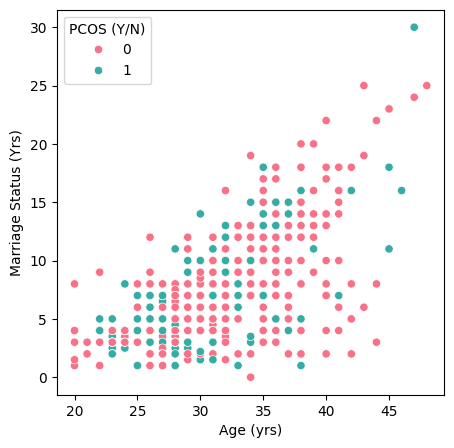

In [56]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="Age (yrs)", y="Marriage Status (Yrs)", data=df, hue='PCOS (Y/N)', palette='husl')

In [38]:
df[df["Age (yrs)"] <= 22]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
10,0,20,71.0,163.000,26.7,15,80,20,10.0,2,5,4.0,1,2,158.51,158.51,4.89,2.02,2.42,39,35,0.90,1.56,4.47,13.47,18.10,0.36,108.0,0,0,0,0,0,0.0,0,110,80,7,15,17.0,20.0,6.0
27,0,20,68.0,152.000,29.4,17,72,20,10.0,4,3,4.0,1,0,689.58,11.24,1.80,0.41,4.39,40,33,0.83,8.39,2.50,11.24,46.30,1.20,92.0,0,0,0,0,0,0.0,0,110,80,3,2,10.0,11.0,10.0
39,0,20,74.0,171.000,25.3,13,74,16,11.1,4,0,1.0,0,0,1.99,1.99,3.52,9.17,0.38,42,36,0.86,2.01,0.33,12.49,38.63,0.32,80.0,0,0,0,0,0,0.0,0,110,70,6,12,13.0,12.0,0.0
88,1,22,69.5,168.000,24.6,13,74,20,12.5,4,2,3.0,0,0,1.99,1.99,5.71,1.44,3.97,44,39,0.89,1.31,3.65,44.89,27.70,0.25,100.0,0,0,0,0,0,0.0,0,110,80,10,13,15.0,16.0,10.0
95,1,22,50.0,155.000,20.8,15,80,20,12.1,2,5,1.0,1,0,1247.56,15.00,2.00,1.00,2.00,38,32,0.84,2.78,2.19,27.86,18.70,0.30,107.0,1,1,1,1,1,1.0,0,120,70,6,10,19.0,19.0,6.0
110,0,21,59.0,150.000,26.2,15,72,18,11.2,4,6,2.0,1,0,26290.26,3350.19,4.13,5.11,0.81,41,34,0.83,1.26,21.90,13.97,33.40,1.00,125.0,0,0,1,1,0,0.0,1,100,70,1,1,11.0,10.0,8.5
122,1,22,79.0,155.000,32.9,11,72,18,11.3,2,5,4.0,0,0,138.68,586.06,4.14,4.06,1.02,45,37,0.82,2.90,17.90,21.92,22.92,0.42,92.0,1,0,1,0,1,1.0,1,110,80,6,10,16.0,15.0,13.4
132,1,22,60.0,154.000,25.3,15,70,18,12.7,2,5,4.0,0,0,1.99,1.99,6.44,5.78,1.11,45,34,0.76,2.96,8.80,26.72,41.70,0.30,85.0,1,1,1,0,0,1.0,0,110,80,3,3,16.0,17.0,9.7
231,0,22,78.0,154.000,32.9,15,72,18,12.4,2,5,9.0,0,1,150.91,150.91,5.21,2.19,2.38,40,36,0.90,1.24,16.70,10.02,20.80,0.27,77.0,1,0,0,0,1,0.0,0,120,80,1,1,13.0,10.0,8.8
239,0,20,56.0,159.000,22.2,13,72,18,12.4,2,5,1.5,1,0,389.26,41.77,5.90,3.13,1.88,35,33,0.94,0.61,7.30,10.60,22.00,0.25,86.0,0,0,0,0,1,0.0,1,120,80,10,5,15.0,18.0,8.0


In [43]:
df[df["I beta-HCG(mIU/mL)"] >= df["I beta-HCG(mIU/mL)"].quantile(0.99)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
110,0,21,59.0,150.0,26.2,15,72,18,11.2,4,6,2.0,1,0,26290.26,3350.19,4.13,5.11,0.81,41,34,0.83,1.26,21.90,13.97,33.4,1.00,125.0,0,0,1,1,0,0.0,1,100,70,1,1,11.0,10.0,8.5
111,0,26,75.0,170.0,26.0,15,72,18,11.2,4,2,3.0,1,0,32460.97,97.63,6.21,2.18,2.85,40,34,0.85,2.44,1.60,21.48,25.3,0.28,100.0,0,1,1,1,0,1.0,1,120,80,5,4,17.0,19.0,10.0
214,0,29,63.0,152.0,27.3,11,72,18,13.2,2,6,11.0,1,4,25000.00,475.04,1.99,1.61,1.24,38,34,0.89,1.77,5.96,21.95,22.7,0.46,95.0,1,0,0,1,1,1.0,0,110,80,6,7,16.0,14.0,5.0
252,1,47,62.7,154.0,26.4,15,72,18,10.0,4,4,30.0,1,2,25000.00,25000.00,1.88,0.25,7.52,38,36,0.95,2.47,6.20,31.47,12.1,0.25,92.0,1,1,1,1,0,0.0,0,110,80,14,11,16.0,19.0,9.3
446,0,29,63.0,162.0,24.0,11,72,18,13.2,2,5,11.0,0,0,30004.00,475.04,1.99,1.61,1.24,39,37,0.95,1.77,5.96,21.95,22.7,0.46,95.0,0,1,1,0,0,1.0,0,110,80,6,7,18.0,19.0,5.9
447,1,47,62.7,160.0,24.5,15,72,18,10.0,4,7,30.0,0,0,30007.00,1.99,1.88,0.25,7.52,39,36,0.92,2.47,6.20,31.47,12.1,0.25,92.0,0,0,0,0,1,1.0,1,110,80,14,11,20.0,19.0,6.0


<Axes: xlabel='Age (yrs)', ylabel='No. of abortions'>

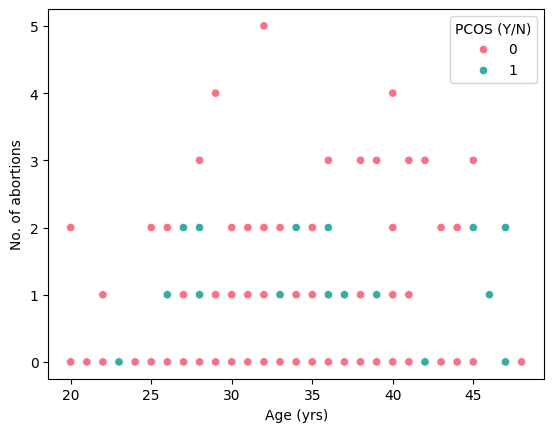

In [62]:
sns.scatterplot(x="Age (yrs)", y="No. of abortions", data=df, hue='PCOS (Y/N)', palette='husl')

----------

In [31]:
df.sample(3)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
294,1,28,55.5,144.0,26.8,13,72,20,11.8,2,5,6.5,1,2,785.95,785.95,4.00,2.95,1.36,38,35,0.92,0.86,18.5,7.49,20.4,0.62,95.0,1,1,1,0,1,1.0,0,120,80,13,20,14.0,16.0,9.6
490,0,35,61.0,154.0,25.7,12,80,20,10.2,4,7,16.0,0,0,1.99,1.99,4.62,1.23,3.76,40,38,0.95,1.17,1.1,54.86,27.2,0.50,92.0,1,1,1,1,1,1.0,0,120,70,3,2,19.0,16.0,6.0
378,0,23,50.0,155.0,20.8,15,72,18,10.8,4,6,3.0,0,0,2.00,2.00,9.59,5.98,1.60,37,34,0.92,3.63,2.9,30.85,21.1,0.75,92.0,0,0,0,1,1,0.0,0,110,70,3,5,18.0,18.0,11.2


In [32]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

## Visualization

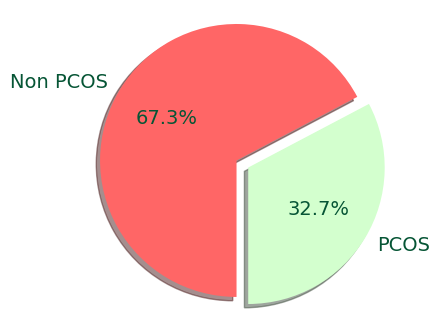

In [33]:
PCOS=df[df['PCOS (Y/N)']==1].shape[0]
non_PCOS= df[df['PCOS (Y/N)']==0].shape[0]

slices=[PCOS,non_PCOS]
labels=['PCOS','Non PCOS']
explode=[0.1,0]

colors = ['#d3ffce', '#ff6666']
#794044  #065535

fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')  
plt.show()

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

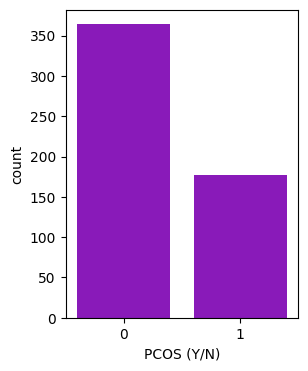

In [34]:
plt.figure(figsize=(3,4))
sns.countplot(data=df, x='PCOS (Y/N)', color="darkviolet")
#plt.xticks(rotation=90)

<Figure size 0x1000 with 0 Axes>

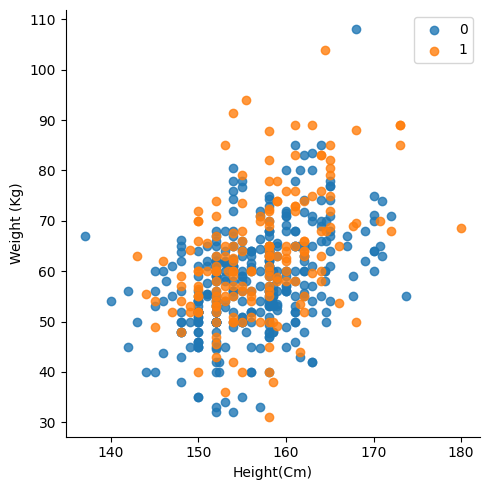

In [35]:
plt.figure(figsize=(0,10))
sns.lmplot(x="Height(Cm)", y="Weight (Kg)", data=df, fit_reg=False, hue='PCOS (Y/N)', legend=False)
plt.legend(loc='upper right')
plt.show()

In [36]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of FSH by PCOS')

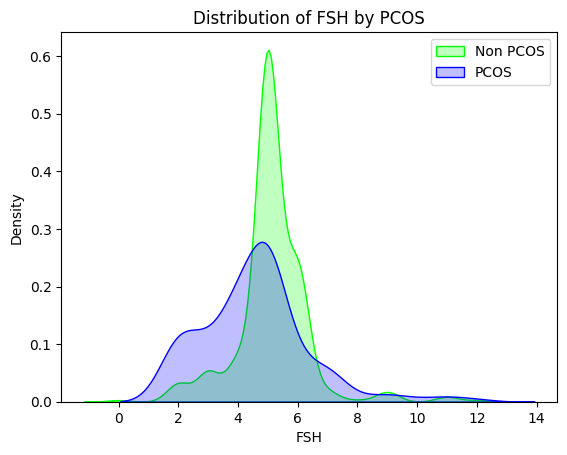

In [67]:
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 0)], color="Lime", shade = True)
ax = sns.kdeplot(df["Cycle length(days)"][(df['PCOS (Y/N)'] == 1)], ax =ax, color="Blue", shade= True)
ax.legend(["Non PCOS","PCOS"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('FSH')
ax.set_title('Distribution of FSH by PCOS')

In [38]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

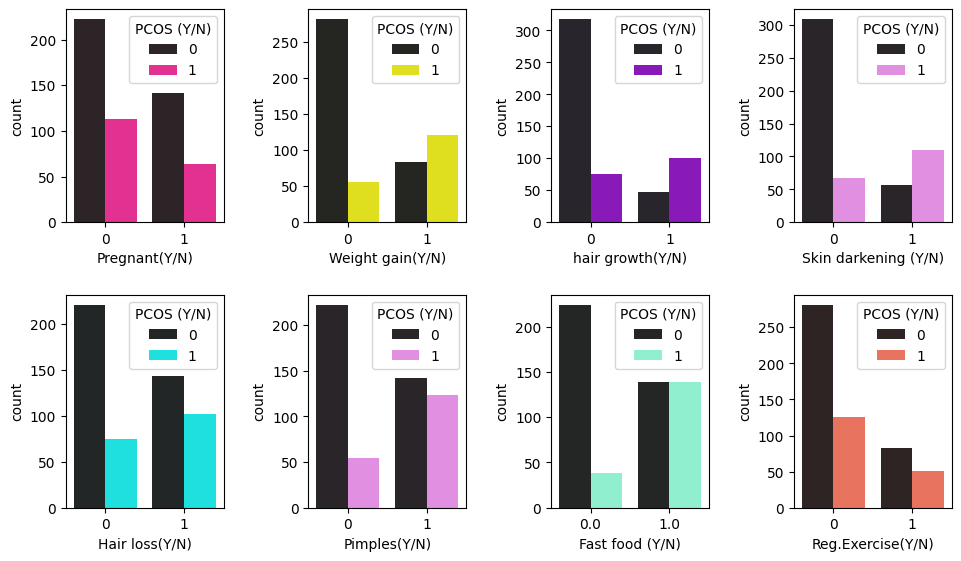

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
sns.countplot(df, x="Pregnant(Y/N)", hue="PCOS (Y/N)", color='deeppink')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,2)
sns.countplot(df, x="Weight gain(Y/N)", hue="PCOS (Y/N)", color='yellow')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,3)
sns.countplot(df, x="hair growth(Y/N)", hue="PCOS (Y/N)", color='darkviolet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,4)
sns.countplot(df, x="Skin darkening (Y/N)", hue="PCOS (Y/N)", color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,5)
sns.countplot(df, x="Hair loss(Y/N)", hue="PCOS (Y/N)",  color='cyan')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,6)
sns.countplot(df, x="Pimples(Y/N)", hue="PCOS (Y/N)",  color='violet')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,7)
sns.countplot(df, x="Fast food (Y/N)", hue="PCOS (Y/N)",  color='aquamarine')
plt.tight_layout(pad=2.1)
plt.subplot(2,4,8)
sns.countplot(df, x="Reg.Exercise(Y/N)", hue="PCOS (Y/N)", color='tomato')
plt.tight_layout(pad=2.1)


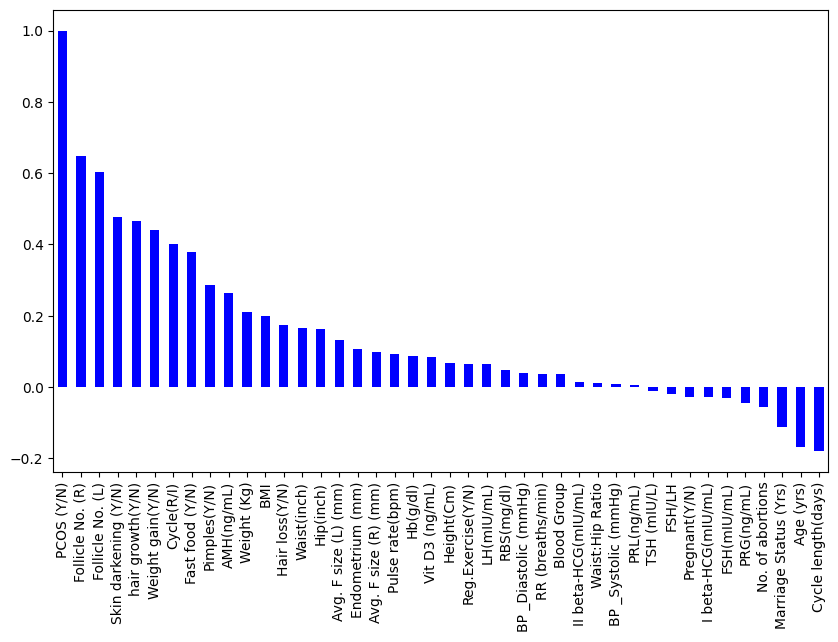

In [39]:
plt.figure(figsize=(10,6))
df.corr()['PCOS (Y/N)'].sort_values(ascending = False).plot(kind='bar', color= 'blue')
plt.xticks(rotation=90);

In [47]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

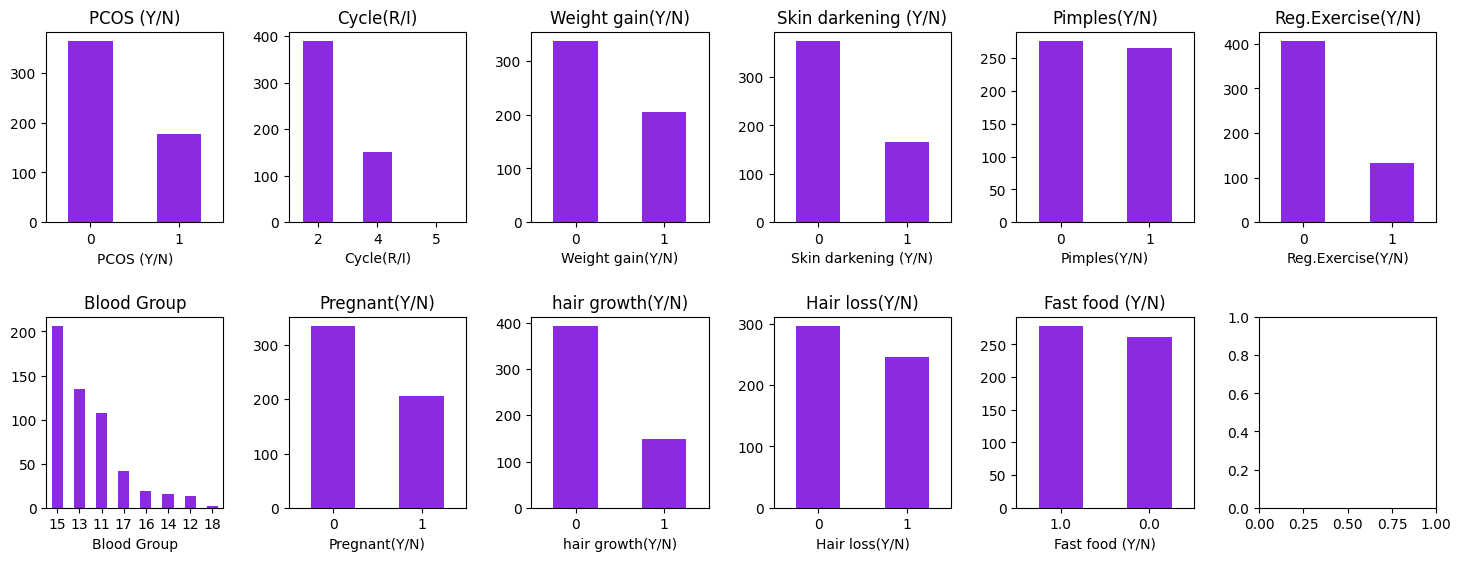

In [73]:
services = ['PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

fig, axes = plt.subplots(nrows = 2, ncols = 6, figsize = (15,6))
for i, item in enumerate(services):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blueviolet')
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-2,1],rot = 0, color='blueviolet')
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color='blueviolet')
    elif i >=6 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-8,3],rot = 0, color='blueviolet')    
    elif i >=8 and i < 10:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-10,4],rot = 0, color='blueviolet')   
    elif i < 12:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-12,5],rot = 0, color='blueviolet') 
    ax.set_title(item)
    plt.tight_layout(pad=2.1)

Text(0.5, 1.0, 'Correlation Heatmap')

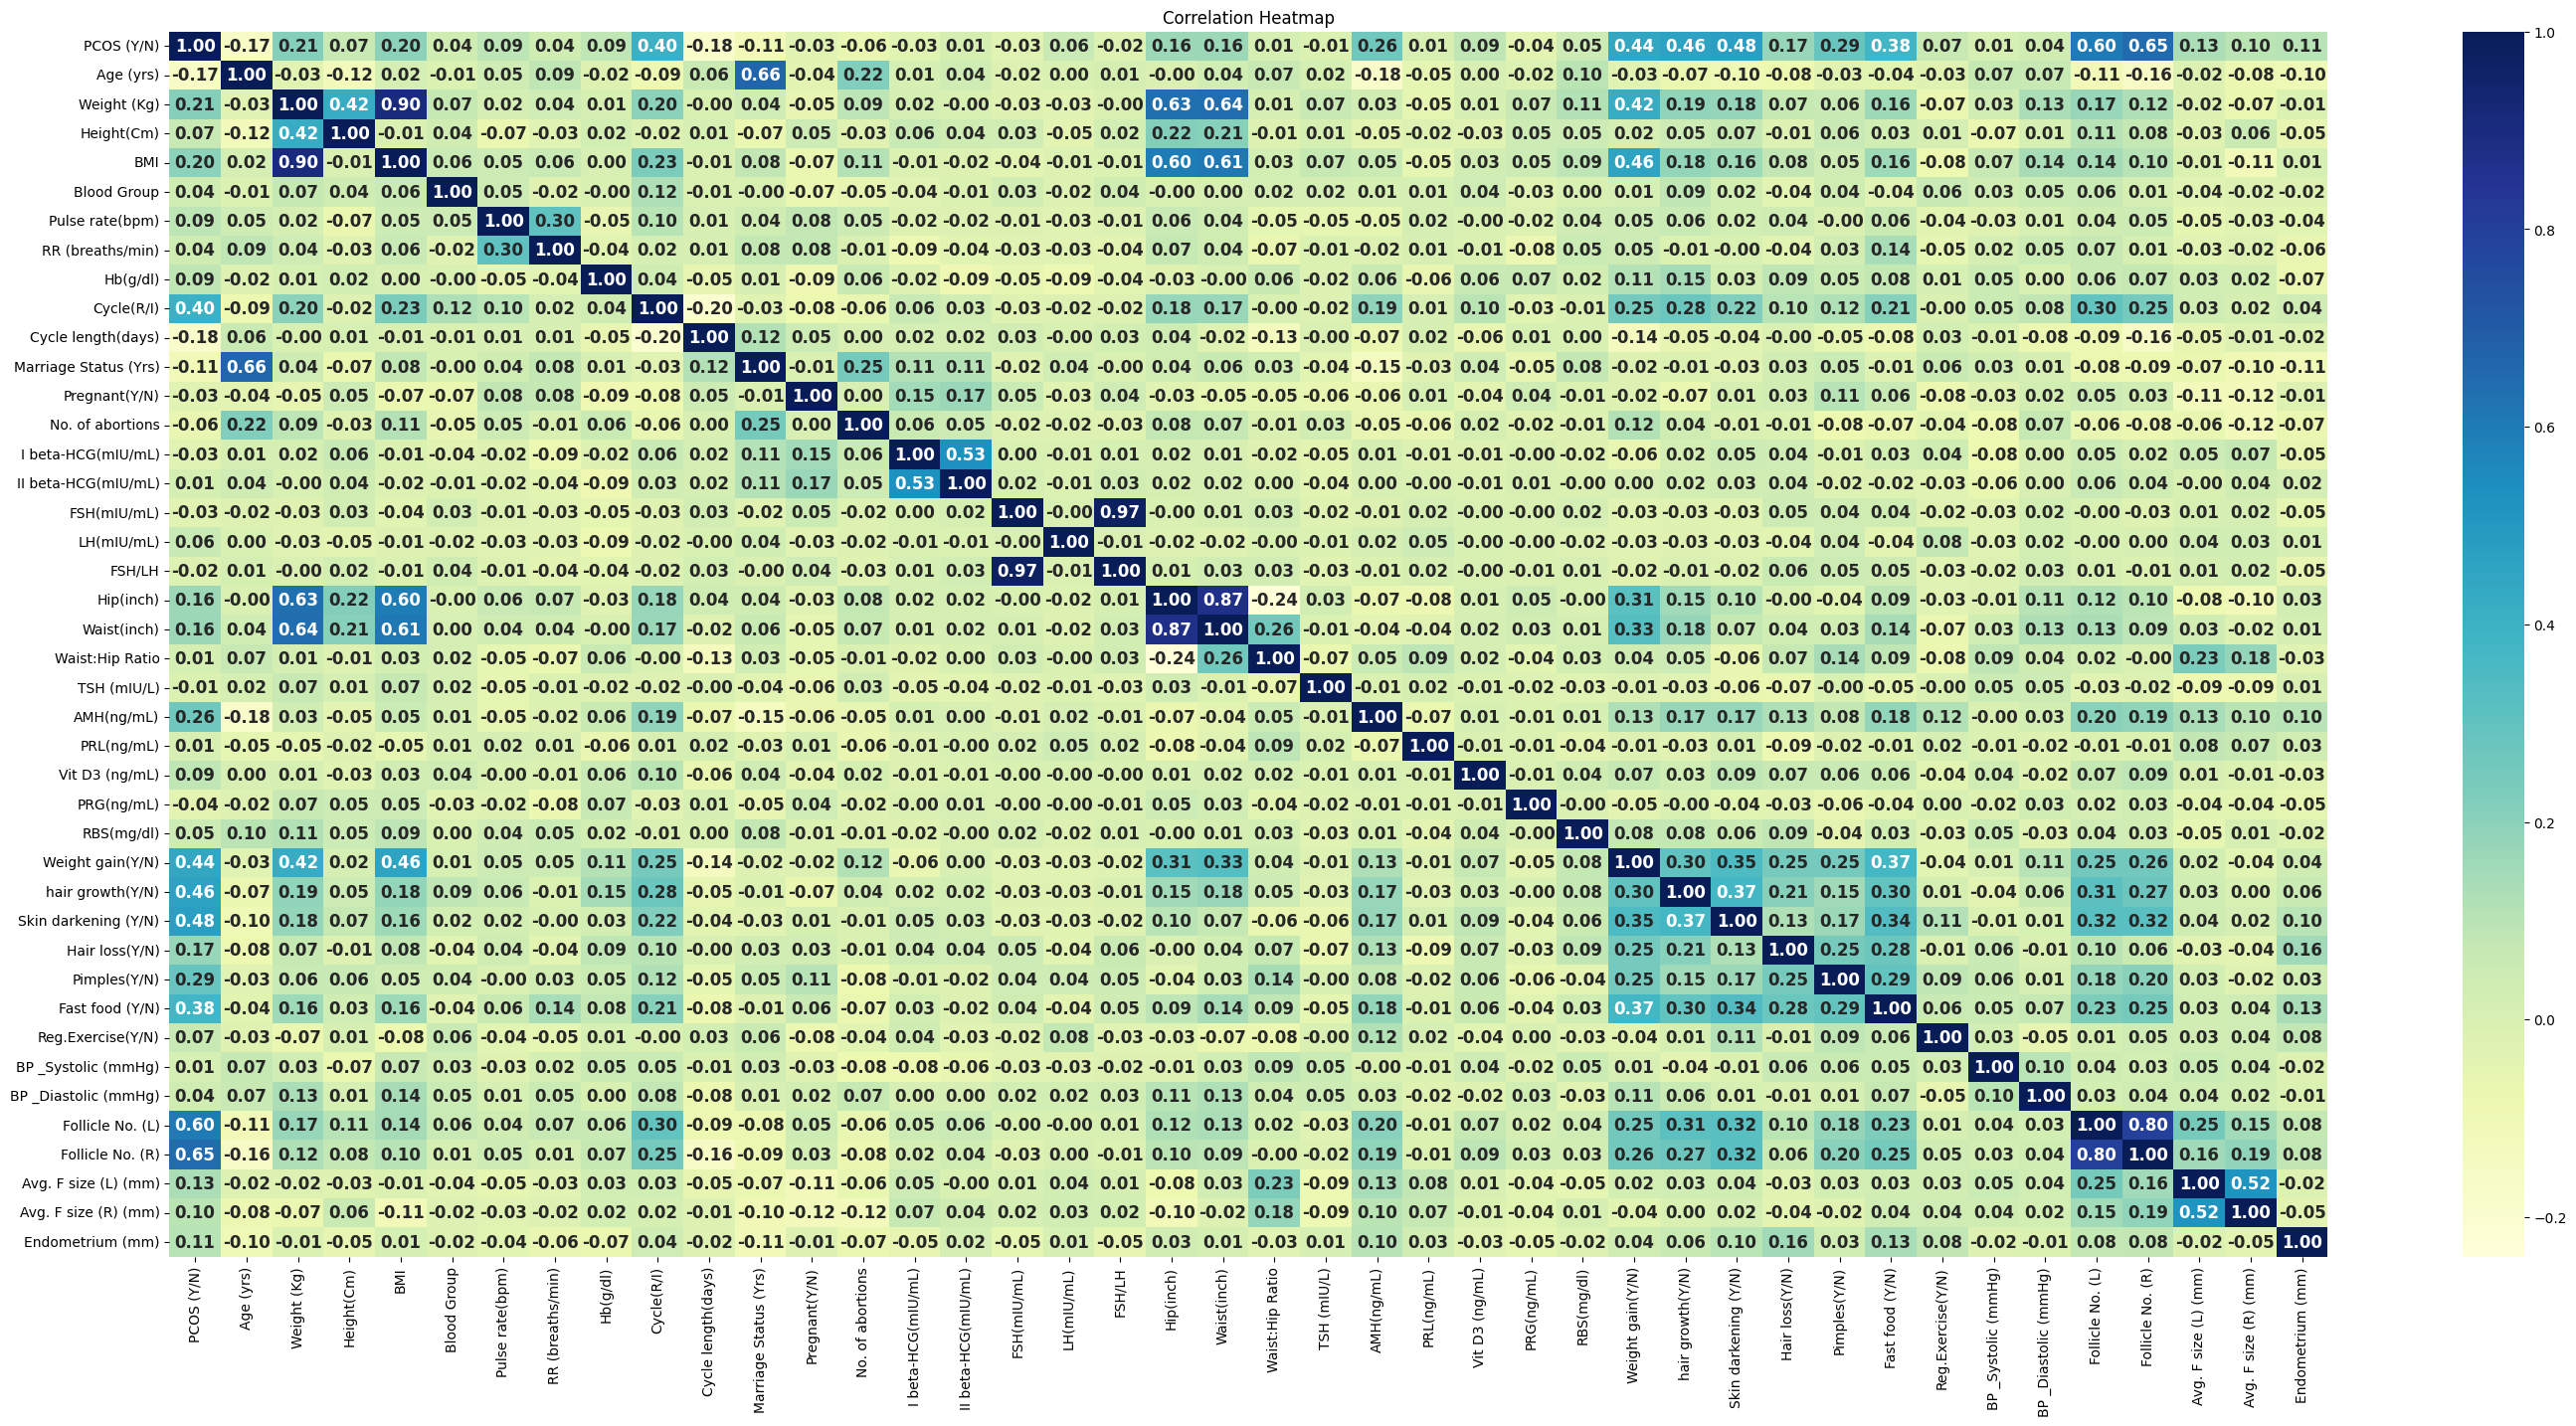

In [79]:
corr = df.corr()
plt.figure(figsize = (35,16))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt='.2f', annot_kws={'size': 12, 'fontweight': 'semibold'})
plt.title('Correlation Heatmap')

In [42]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

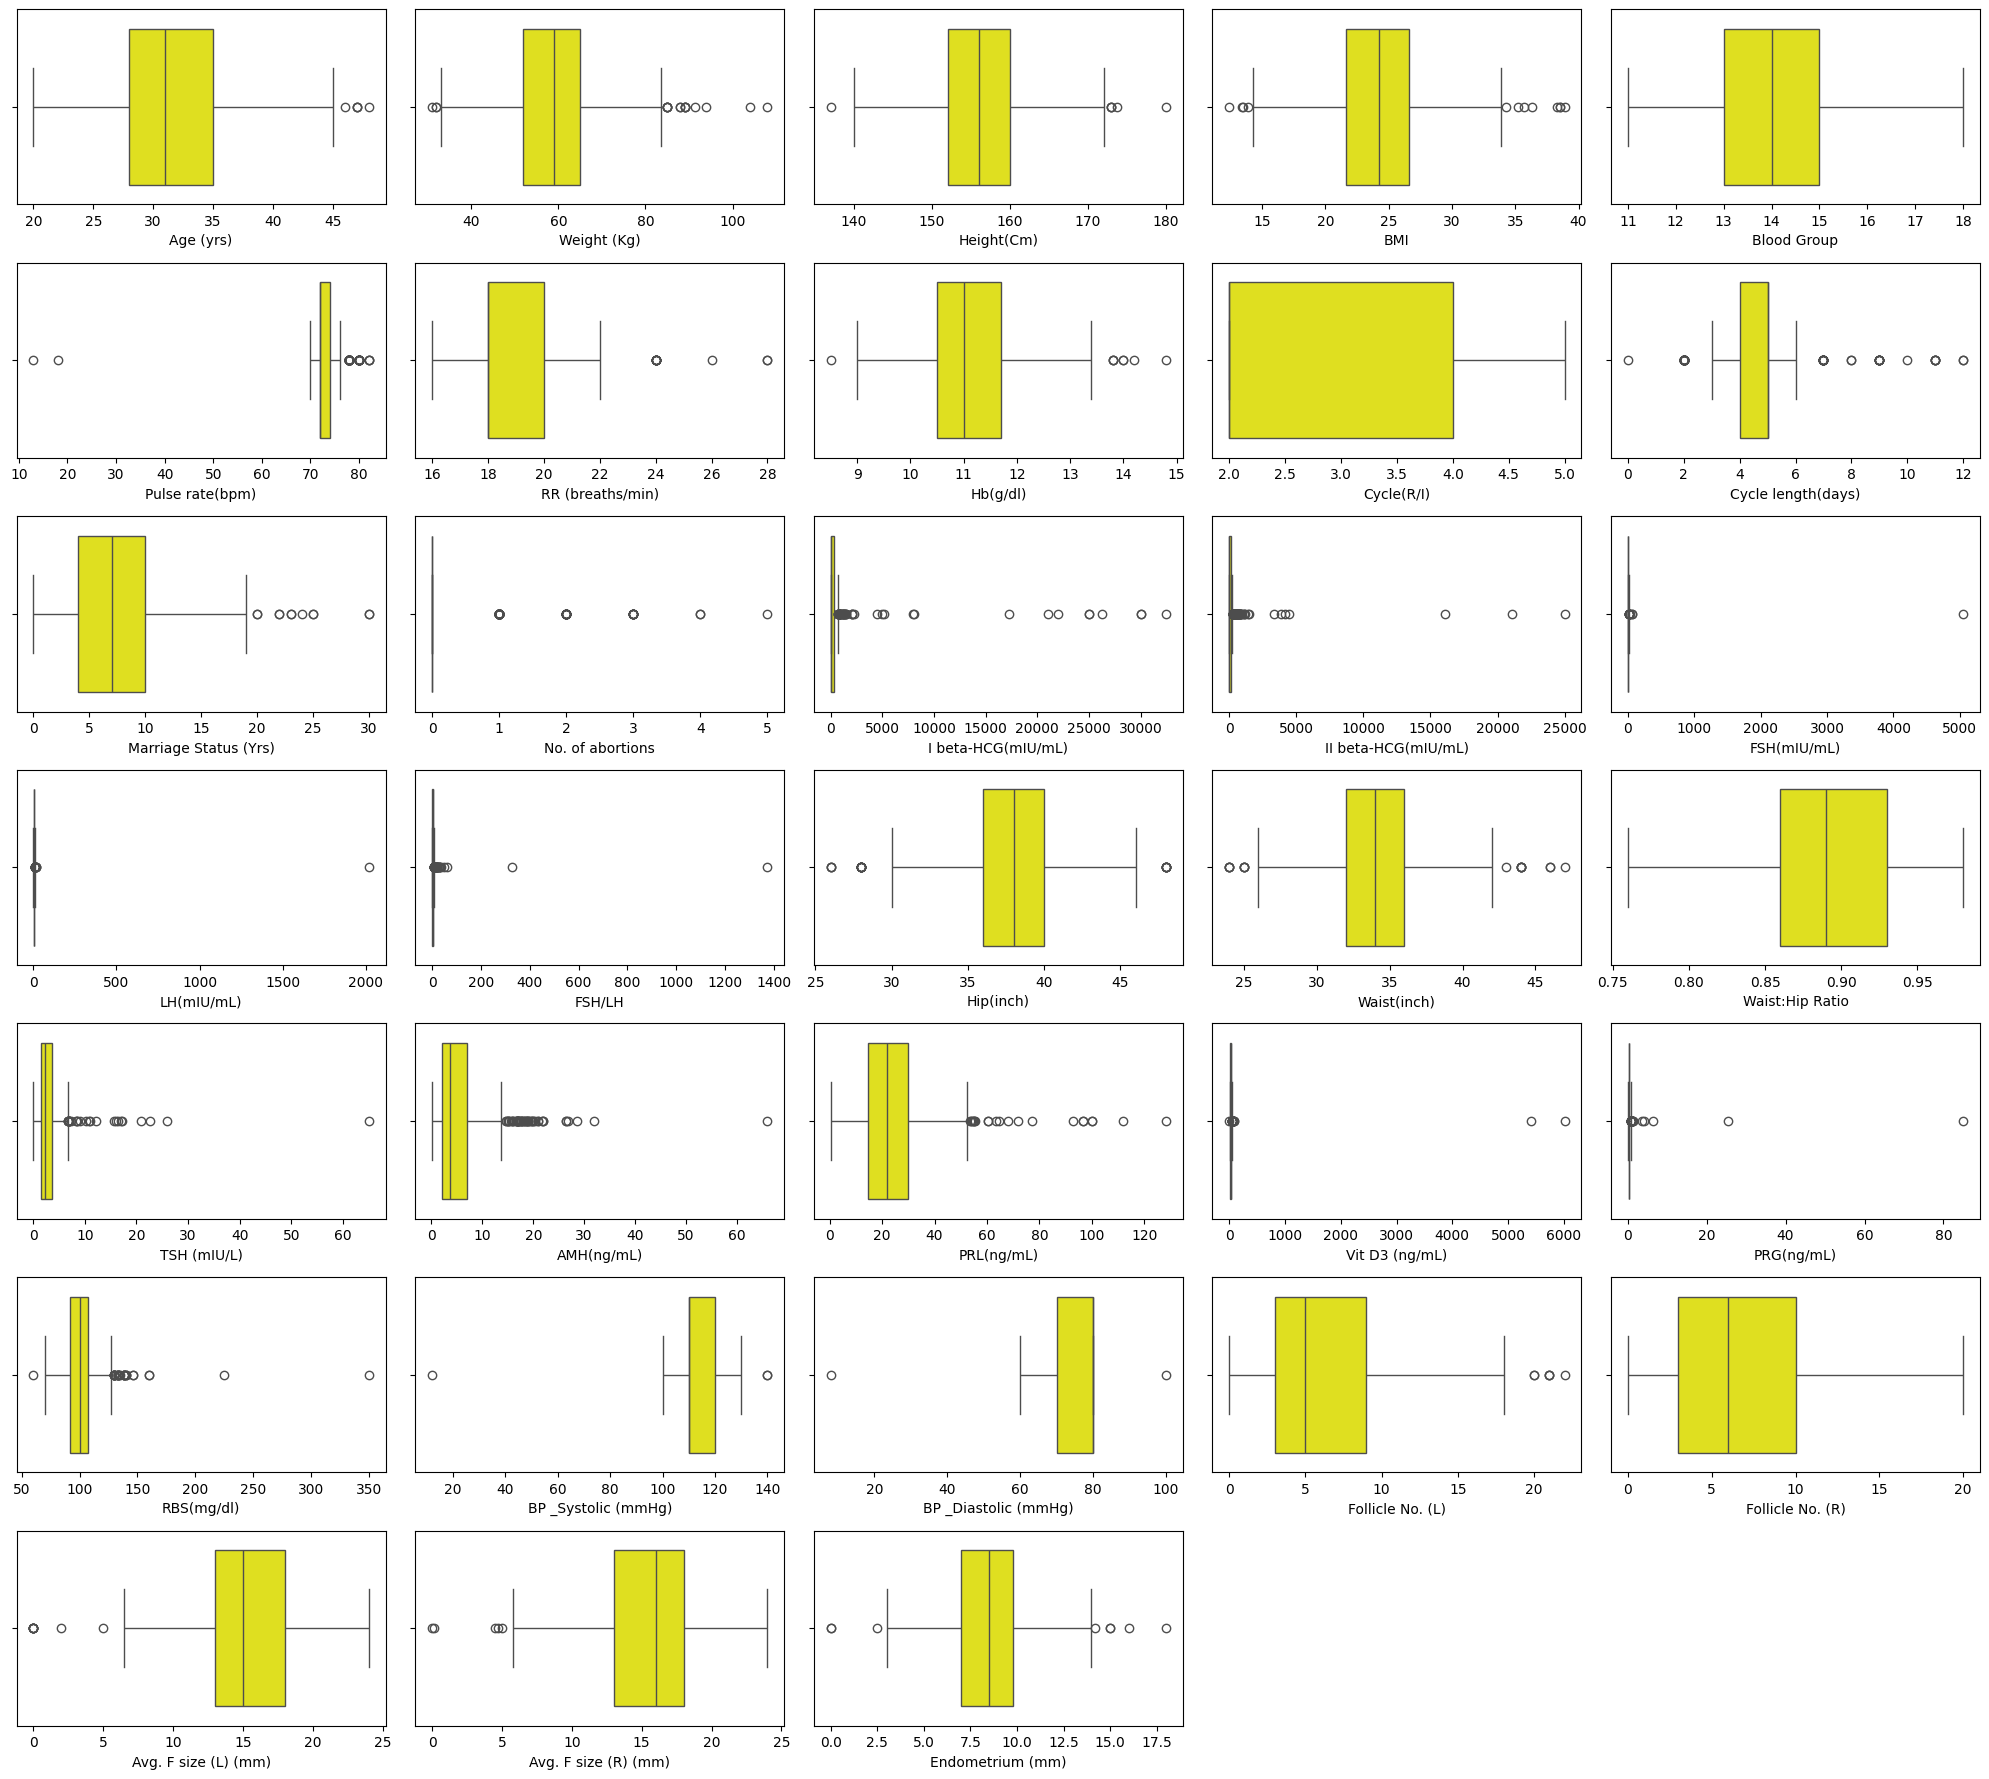

In [46]:
plt.figure(figsize=(20,20))
num = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marriage Status (Yrs)', 'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
num_df = df[num]
for num,col in enumerate(num_df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(num_df[col], orient="h", color='yellow')
    plt.tight_layout()

---------

In [104]:
y = df[["PCOS (Y/N)"]]
X = df.drop("PCOS (Y/N)", axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

In [130]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8895705521472392

In [131]:
from sklearn.metrics import f1_score, jaccard_score, roc_auc_score
print(f1_score(y_test, y_pred, average='weighted')) 
print(jaccard_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.8890061604785532
0.7049180327868853
0.8692967409948542


In [132]:
confusion_matrix(y_test, y_pred)

array([[102,   8],
       [ 10,  43]], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        79
           1       0.65      0.67      0.66        30

    accuracy                           0.81       109
   macro avg       0.76      0.76      0.76       109
weighted avg       0.81      0.81      0.81       109



<Axes: >

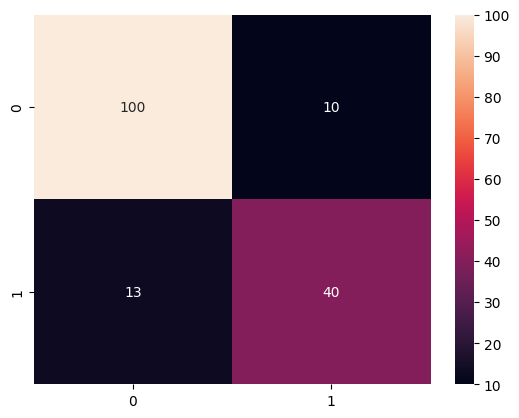

In [149]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

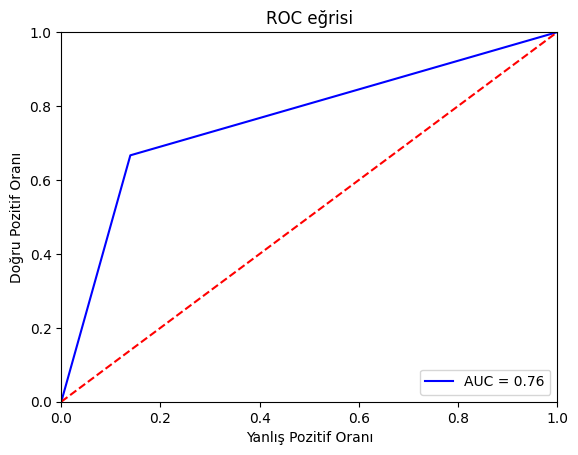

In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('ROC eğrisi')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Doğru Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.show()

In [144]:
from sklearn.model_selection import GridSearchCV

In [147]:

parameters = {'criterion':['gini','entropy'],'max_depth':[2,5,10,20,30,90],'random_state':[42,34,2]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)

grid.fit(X_train, y_train)
best_parameters=grid.best_params_

print("en iyi parametreler: \n",best_parameters)

grid_model = DecisionTreeClassifier(criterion=best_parameters["criterion"],
                               max_depth=best_parameters["max_depth"])

tuned_model = grid_model.fit(X_train, y_train)
y_pred = tuned_model.predict(X_test)

accuracy_score(y_test, y_pred)

en iyi parametreler: 
 {'criterion': 'gini', 'max_depth': 10, 'random_state': 2}


0.8588957055214724